In [2]:
import numpy as np
import pylab as plt
from openpyxl import load_workbook

In [2]:
data_file1 = '00.PRC_Self2Single24to1.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wb1 = load_workbook(data_file1)

# List all the sheets in the file.
#print("Found the following worksheets:")
#for sheetname in wb1.sheetnames:
#    print(sheetname)
ws1 = wb1[wb1.sheetnames[0]]
all_rows1 = list(ws1.rows)
# Pull information from specific cells.
i = 0
#print(len(all_rows1))
Phase_Single = np.zeros(len(all_rows1)-1)
First_Order_Single = np.zeros(len(all_rows1)-1)
Second_Order_Single = np.zeros(len(all_rows1)-1)
for row in all_rows1[1:len(all_rows1)]:
    Phase_Single[i] = row[1].value
    First_Order_Single[i] = row[2].value
    Second_Order_Single[i] = row[3].value
    i=i+1
    
data_file12 = '00.PRC_Self2Single23to1.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wb12 = load_workbook(data_file12)

# List all the sheets in the file.
#print("Found the following worksheets:")
#for sheetname in wb1.sheetnames:
#    print(sheetname)
ws12 = wb12[wb12.sheetnames[0]]
all_rows12 = list(ws12.rows)
# Pull information from specific cells.
i = 0
#print(len(all_rows1))
Phase_Single2 = np.zeros(len(all_rows12)-1)
First_Order_Single2 = np.zeros(len(all_rows12)-1)
Second_Order_Single2 = np.zeros(len(all_rows12)-1)
for row in all_rows12[1:len(all_rows12)]:
    Phase_Single2[i] = row[1].value
    First_Order_Single2[i] = row[2].value
    Second_Order_Single2[i] = row[3].value
    i=i+1

In [29]:
data_file2 = '4.Single2SSingle5P7.xlsx'#PRC for selfconnected neurons with delay 0.8, ptbd by single

# Load the entire workbook.
wb2 = load_workbook(data_file2)

# List all the sheets in the file.
print("Found the following worksheets:")
for sheetname in wb2.sheetnames:
    print(sheetname)
# Load one worksheet.
ws2 = wb2[sheetname]
all_rows2 = list(ws2.rows)

j = 0
Phase_Self = np.zeros(len(all_rows2)-1)
First_Order_Self = np.zeros(len(all_rows2)-1)
#Second_Order_Self = np.zeros(len(all_rows2)-1)
for row in all_rows2[1:len(all_rows2)]:
    Phase_Self[j] = row[1].value
    First_Order_Self[j] = row[2].value
    #Second_Order_Self[j] = row[3].value
    j=j+1

#print(len(Phase_Single),len(First_Order_Single))
#print(len(Phase_Self),len(First_Order_Self))

Found the following worksheets:
Single2Single_1to24


In [30]:
P_1 = 5.9733
DELAY = 5.7
#print('Period_Free_35',period_free_35)
print(P_1)
#Stim_Phase_1 = 0.848647
Stim_Phase_1 = DELAY/P_1
print(Stim_Phase_1)
index1 = Stim_Phase_1*100
index1 = int(index1)
print(index1)
#print(First_Order_Single[index1-1],First_Order_Single[index1],First_Order_Single[index1+1],First_Order_Single[index1+2],First_Order_Single[index1+3])
#print(Phase_Single[index1-1],Phase_Single[index1],Phase_Single[index1+1],Phase_Single[index1+2],Phase_Single[index1+3])

#P_N1 = P_1*(1 + First_Order_Single[index1])
P_N_1 = P_1
#P_N = round(P_N,2)
print('P_(N-1) is given by',P_N_1)

5.9733
0.954246396464266
95
P_(N-1) is given by 5.9733


In [31]:
Stim_Phase_2 = DELAY/P_N_1
print(Stim_Phase_2)
index2 = 100*Stim_Phase_2
index2 = int(index2)
print(index2)
m1 = ((First_Order_Single[index1+1])-(First_Order_Single[index1]))/(Phase_Single[index1+1] - Phase_Single[index1])
m11 = ((First_Order_Single[index1+2])-(First_Order_Single[index1]))/(Phase_Single[index1+2] - Phase_Single[index1])
m12 = ((First_Order_Single[index1+3])-(First_Order_Single[index1]))/(Phase_Single[index1+3] - Phase_Single[index1])
m13 = ((First_Order_Single[index1])-(First_Order_Single[index1-1]))/(Phase_Single[index1] - Phase_Single[index1-1])
m2 = ((First_Order_Self[index2+1])-(First_Order_Self[index2]))/(Phase_Self[index2+1] - Phase_Self[index2])
m21 = ((First_Order_Self[index2+2])-(First_Order_Self[index2]))/(Phase_Self[index2+2] - Phase_Self[index2])
m22 = ((First_Order_Self[index2])-(First_Order_Self[index2-1]))/(Phase_Self[index2] - Phase_Self[index2-1])
print('Eigen Values are given by: ',m1,m2,1-m1-m2)
print('Eigen Values are given by: ',m11,m21,1-m11-m21)
print('Eigen Values are given by: ',m12,m22,1-m12-m22)
print('Eigen Values are given by: ',m13,m2,1-m13-m2)

0.954246396464266
95
Eigen Values are given by:  -0.17708216880938388 -0.27040878308283217 1.4474909518922159
Eigen Values are given by:  -0.14387926215763047 -0.2808091208936693 1.4246883830512997
Eigen Values are given by:  -0.11805477920625118 -0.20800675621754539 1.3260615354237966
Eigen Values are given by:  -0.3320290665176431 -0.27040878308283217 1.6024378496004752


In [13]:
#Time-Lag Interval Values based on PRCs
#tl12 = (P_1* Stim_Phase_1) - DELAY
#tl21 = DELAY + (P_N*(1 - Phase_Self[index2] + First_Order_Self[index2]))
#print(tl12,tl21)
tl1_12 = (P_N_1* Stim_Phase_2) - DELAY
tl1_21 = DELAY + (P_1*(1 - Phase_Single[index1] + First_Order_Single[index1]))
#print(tl12,tl21)
print(tl1_12,tl1_21)

0.0 6.310121343344156


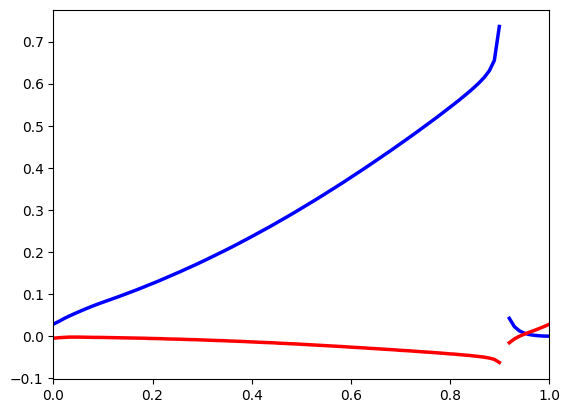

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
#plt.title('Existence of Phase Locked Modes for Delay = 4.2 ms')
#plt.plot(x1, y1, 'b.', markersize=3.5, label='Neuron1')
#plt.plot(x2, y2, 'r.', markersize=3.5,  label='Neuron2')
plt.plot(Phase_Single[:90], First_Order_Single[:90], 'b', linewidth=2.5)
plt.plot(Phase_Single[91:], First_Order_Single[91:], 'b', linewidth=2.5)
plt.plot(Phase_Single[:90], Second_Order_Single[:90], 'r', linewidth=2.5)
plt.plot(Phase_Single[91:], Second_Order_Single[91:], 'r', linewidth=2.5)
#plt.ylabel('Phase Reset')
#plt.xlabel('Phase')

#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlim([0,1])
#plt.ylim([10,14])
plt.savefig('PRC_Hyper_Both.eps', format='eps')
plt.show()

# Checking Existence Criterion

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


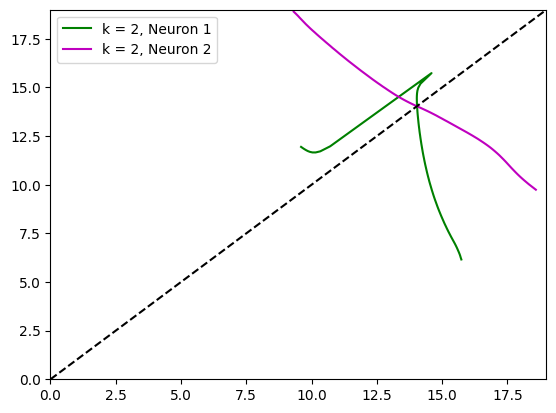

In [9]:
delta_1 = DELAY
delta_2 = DELAY


x1 = np.zeros(len(Phase_Single))
y1 = np.zeros(len(Phase_Single))
x2 = np.zeros(len(Phase_Self))
y2 = np.zeros(len(Phase_Self))

#tuple1 = np.zeros((len(phase),4))
#tuple2 = np.zeros((len(phase),2))

#x1 = delta_1 + delta_2 + (P_1*(1 - Phase_Single + First_Order_Single))
#y1 = (P_1*Phase_Single) #Basically we are trying to plot ts_1 = P_1*Phi_1 on y axis

#x2 = (P_N*Phase_Self) #Basically we are trying to plot ts_1 = P_1*Phi_1 on y axis
#y2 = delta_1 + delta_2 + (P_N*(1 - Phase_Self + First_Order_Self))

x12 = delta_1 + delta_2 + (P_1*(1 - Phase_Single + First_Order_Single))
y12 = 2*(P_1*Phase_Single) + (P_1*(1 - Phase_Single + First_Order_Single))

x22 = 2*(P_N*Phase_Self) + (P_N*(1 - Phase_Self + First_Order_Self))
y22 = delta_1 + delta_2 + (P_N*(1 - Phase_Self + First_Order_Self))

x3 = np.zeros(20)
y3 = np.zeros(20)

for i in range(20):
    x3[i] = i
    y3[i] = i

#tuple1[:,0] = x12
#tuple1[:,1] = x22
#tuple1[:,2] = y12
#tuple1[:,3] = y22

#print(tuple1)


fig = plt.figure()
ax = fig.add_subplot()
#plt.title('Existence of Phase Locked Modes for Delay = 4.2 ms')
#plt.plot(x1, y1, 'b.', markersize=3.5, label='Neuron1')
#plt.plot(x2, y2, 'r.', markersize=3.5,  label='Neuron2')
plt.plot(x12, y12, 'g-', markersize=4.5,  label='k = 2, Neuron 1')
plt.plot(x22, y22, 'm-', markersize=4.5, label='k = 2, Neuron 2')
plt.plot(x3, y3, 'k--', markersize=4.5)
plt.legend()
#plt.ylabel('Intervals1')
#plt.xlabel('Intervals2')

#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlim([0,19])
plt.ylim([0,19])
plt.savefig('Existence_4P8.eps', format='eps')
plt.show()

In [25]:
data_filed = 'DelayvsTimeLag_25.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wbd = load_workbook(data_filed)

# List all the sheets in the file.
#print("Found the following worksheets:")
for sheetname in wbd.sheetnames:
    print(sheetname)
wsd = wbd[wbd.sheetnames[0]]
all_rowsd = list(wsd.rows)
# Pull information from specific cells.
i = 0
print(len(all_rowsd))
Delay = np.zeros(len(all_rowsd))
tl12_pred = np.zeros(len(all_rowsd))
tl21_pred = np.zeros(len(all_rowsd))
tl12_obs = np.zeros(len(all_rowsd))
tl21_obs = np.zeros(len(all_rowsd))
for row in all_rowsd[0:len(all_rowsd)]:
    Delay[i] = row[0].value
    tl21_pred[i] = row[2].value
    tl12_obs[i] = row[3].value
    tl21_obs[i] = row[4].value
    i=i+1

print(Delay,tl21_pred)
#Delay = Delay/5.97

Sheet1
16
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75  nan] [6.31012   6.448983  6.57709   6.715922  6.86647   7.028233  7.2017
 7.387211  7.583366  7.79018   8.00767   8.2344993 8.47065   8.71614
 8.977298        nan]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


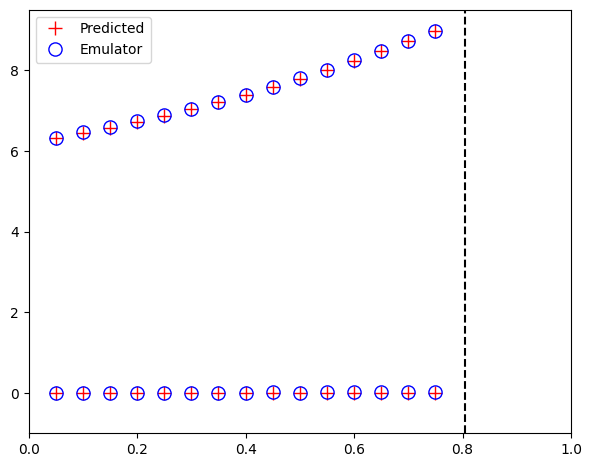

In [30]:
fig = plt.figure(figsize=(7,5.5))#figsize=(8,8)
ax = fig.add_subplot()
#plt.title('Eigen Values for Various Delays for ')
plt.plot(Delay, tl12_pred, 'r+',markersize=9.5, linewidth = 1.0, clip_on=False, label='Predicted')
plt.plot(Delay, tl21_pred, 'r+', markerfacecolor='none', linewidth = 1.0,markersize=9.5,clip_on=False)
plt.plot(Delay, tl12_obs, 'bo',markerfacecolor='none', linewidth = 1.0, markersize=9.5,clip_on=False, label='Emulator')
plt.plot(Delay, tl21_obs, 'bo', markerfacecolor='none' ,linewidth = 1.0,  markersize=9.5,clip_on=False)
plt.axvline(x = (4.8/5.97),color='k',linestyle='--')
#plt.plot(x2, y2, 'r.', markersize=2.5,  label='Neuron2')
#plt.plot(x12, y12, 'g.', markersize=2.5,  label='k = 2, Neuron1')
#plt.plot(x22, y22, 'k.', markersize=2.5, label='k = 2, Neuron2')
plt.legend()
#plt.ylabel('Eigen Value')
#plt.xlabel('Intervals2')

#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.xlim([0,20])
#plt.ylim([0,20])
#plt.savefig('DelayVsEigen.eps', format='eps')
plt.xlim([0,1])
plt.ylim([-1,9.5])

plt.savefig('DelayVsTime_Lag.eps', format='eps')
plt.show()

In [ ]:
data_filed = 'EigenVsCluster.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wbd = load_workbook(data_filed)

# List all the sheets in the file.
#print("Found the following worksheets:")
for sheetname in wbd.sheetnames:
    print(sheetname)
wsd1 = wbd[wbd.sheetnames[1]]
all_rowsd1 = list(wsd1.rows)
# Pull information from specific cells.
i = 0
print(len(all_rowsd1))
Number = np.zeros(len(all_rowsd1))
Eigen = np.zeros(len(all_rowsd1))
for row in all_rowsd1[0:len(all_rowsd1)]:
    Number[i] = int(row[0].value)
    Eigen[i] = row[1].value
    i=i+1

print(Number,Eigen)

In [ ]:
fig = plt.figure(figsize=(7,5))#figsize=(8,8)
ax = fig.add_subplot()
#plt.title('Eigen Values for Various Delays for ')
plt.plot(Number, Eigen, 'ms',markersize=8.5)

plt.savefig('EigenVsCluster.eps', format='eps')
plt.show()

In [3]:
data_filed2 = 'RelevantPRC.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wbd2 = load_workbook(data_filed2)

# List all the sheets in the file.
#print("Found the following worksheets:")
for sheetname in wbd2.sheetnames:
    print(sheetname)
wsd2 = wbd2[wbd2.sheetnames[0]]
all_rowsd2 = list(wsd2.rows)
# Pull information from specific cells.
i = 0
print(len(all_rowsd2))
Phase = np.zeros(len(all_rowsd2))
PRC = np.zeros(len(all_rowsd2))
for row in all_rowsd2[0:len(all_rowsd2)]:
    Phase[i] = (row[0].value)
    PRC[i] = row[1].value
    i=i+1

print(Phase,PRC)

Sheet1
51
[0.041933  0.052018  0.062103  0.092329  0.102414  0.112499  0.142732
 0.152817  0.162903  0.193136  0.203222  0.213308  0.243543  0.253629
 0.263715  0.293952  0.304038  0.314125  0.344363  0.35445   0.364537
 0.394778  0.404865  0.414952  0.445195  0.455282  0.46537   0.495615
 0.505703  0.515791  0.546039  0.556127  0.566215  0.596466  0.606554
 0.616642  0.646896  0.656984  0.667073  0.697294  0.7073842 0.7174744
 0.747766  0.757855  0.767945  0.89916   0.909244  0.919328  0.94958
 0.959664  0.969748 ] [0.002231   0.002231   0.002549   0.002395   0.002707   0.00302
 0.003069   0.003376   0.003683   0.003816   0.004117   0.004419
 0.00443    0.004725   0.005021   0.00511    0.005399   0.005688
 0.006132   0.006415   0.006698   0.006823   0.007192   0.00756
 0.007924   0.008464   0.008824   0.009315   0.009842   0.010369
 0.010795   0.011309   0.011823   0.012523   0.013024   0.013525
 0.01398147 0.01446919 0.01495692 0.02169259 0.02283431 0.02383331
 0.01496258 0.01482274 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


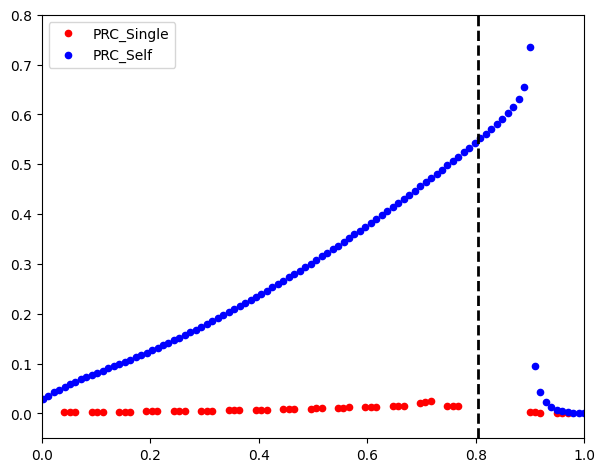

In [23]:
fig = plt.figure(figsize=(7,5.5))#figsize=(8,8)
ax = fig.add_subplot()
#plt.title('Eigen Values for Various Delays for ')
plt.plot(Phase, PRC, 'ro',markersize=4.5, label = 'PRC_Single')
plt.plot(Phase_Single, First_Order_Single, 'bo',markersize=4.5, label = 'PRC_Self')
plt.axvline(x = (4.8/5.97),color='k',linestyle='--',linewidth=2.0)
plt.legend()
plt.xlim([0,1])
plt.ylim([-0.05,0.8])

plt.savefig('Both_PRC.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Sheet1
[0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9 4.2 4.5 4.8 5.1 5.4
 5.7] [6.29729  6.42796  6.54663  6.67596  6.8146   6.96396  7.12129  7.28929
 7.46795  7.65462  7.850622 8.05595  8.26928  8.49195  8.7226   8.96616
 9.2439   6.2906   6.04299 ] [6.276 6.403 6.516 6.64  6.77  6.915 7.066 7.23  7.404 7.6   7.8   7.989
 8.203 8.43  8.671 0.    0.    5.95  5.968]


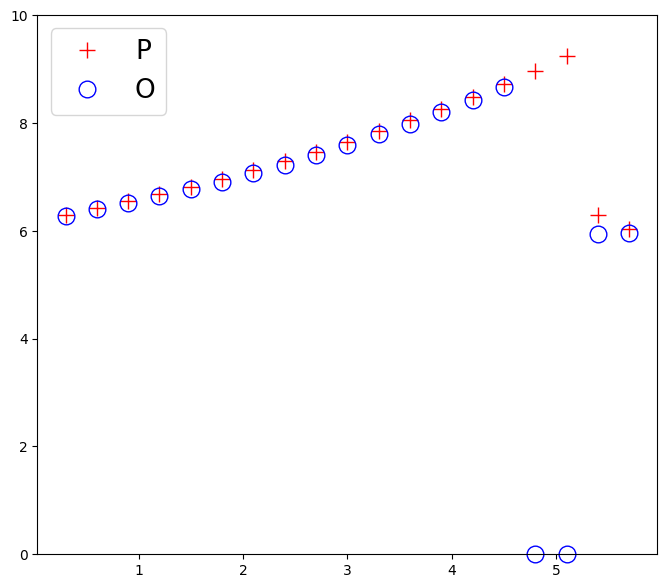

In [97]:
data_file_p = 'Periods_Hyper.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wb_p = load_workbook(data_file_p)

# List all the sheets in the file.
#print("Found the following worksheets:")
for sheetname in wb_p.sheetnames:
    print(sheetname)
ws_p = wb_p[wb_p.sheetnames[0]]
all_rows_p = list(ws_p.rows)
# Pull information from specific cells.
i = 0
length = 20
Delay = np.zeros(length-1)
period_pred = np.zeros(length-1)
period_obs = np.zeros(length-1)
for row in all_rows_p[1:length]:
    Delay[i] = row[0].value
    period_pred[i] = row[1].value
    period_obs[i] = row[2].value
    i=i+1

print(Delay,period_pred,period_obs)

#plt.rcParams.update({"text.usetex": True})

fig = plt.figure(figsize=(8,7))#figsize=(8,8)
ax = fig.add_subplot()
#plt.title('Eigen Values for Various Delays for ')
plt.plot(Delay, period_pred, 'r+',markersize=12, clip_on = False, label = 'P')
plt.plot(Delay, period_obs, 'bo',markerfacecolor='none', markersize=12, clip_on = False, label = 'O')
plt.legend(fontsize = 19)
#plt.xlim([0,1])
#plt.ylim([0,6.5])
plt.ylim([0,10])
plt.savefig('Periods_PredvsObs_Hyper2.eps', format='eps')
plt.show()

In [11]:
data_file5 = 'EV_Shunt.xlsx'#This is for the SelfConnecting to Single Neuron

# Load the entire workbook.
wb5 = load_workbook(data_file5)

# List all the sheets in the file.
#print("Found the following worksheets:")
for sheetname in wb5.sheetnames:
    print(sheetname)
ws5 = wb5[wb5.sheetnames[0]]
all_rows5 = list(ws5.rows)
# Pull information from specific cells.
i = 0
print(len(all_rows5))
Clusters = np.zeros(len(all_rows5)-1)
M1 = np.zeros(len(all_rows5)-1)
M2 = np.zeros(len(all_rows5)-1)
EV = np.zeros(len(all_rows5)-1)
for row in all_rows5[1:len(all_rows5)]:
    Clusters[i] = (row[0].value)
    M1[i] = row[1].value
    M2[i] = row[2].value
    EV[i] = row[3].value
    i=i+1

print(Delay,M1, M2, EV)

Sheet1
13
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  0.] [-0.7304 -0.6897 -0.6704 -0.6281 -0.5856 -0.5654 -0.5449 -0.5014 -0.4805
 -0.4364 -0.4151 -0.3704] [-0.0290375 -0.072289  -0.096058  -0.095099  -0.143     -0.16628
 -0.21303   -0.23585   -0.282017  -0.2809    -0.3265    -0.34855  ] [1.7594375 1.761993  1.766408  1.7231719 1.728598  1.73167   1.75792
 1.7372889 1.7625439 1.7173    1.7416    1.71894  ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


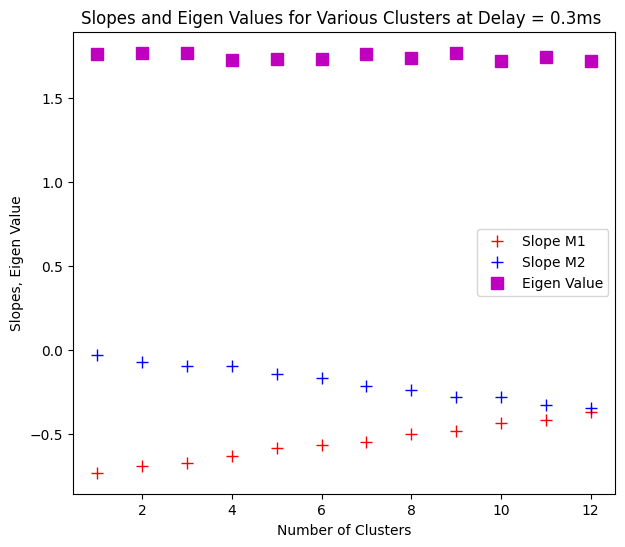

In [12]:
fig = plt.figure(figsize=(7,6))#figsize=(8,8)
plt.title('Slopes and Eigen Values for Various Clusters at Delay = 0.3ms ')
plt.plot(Clusters, M1, 'r+',markersize=8.5, label = 'Slope M1')
plt.plot(Clusters, M2, 'b+',markersize=8.5, label = 'Slope M2')
plt.plot(Clusters, EV, 'ms',markersize=8.5, label = 'Eigen Value')
plt.legend()
plt.ylabel('Slopes, Eigen Value')
plt.xlabel('Number of Clusters')
#plt.axvline(x = (4.8/5.97),color='k',linestyle='--',linewidth=1.0)

plt.savefig('Eigen_Shunt.eps', format='eps')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


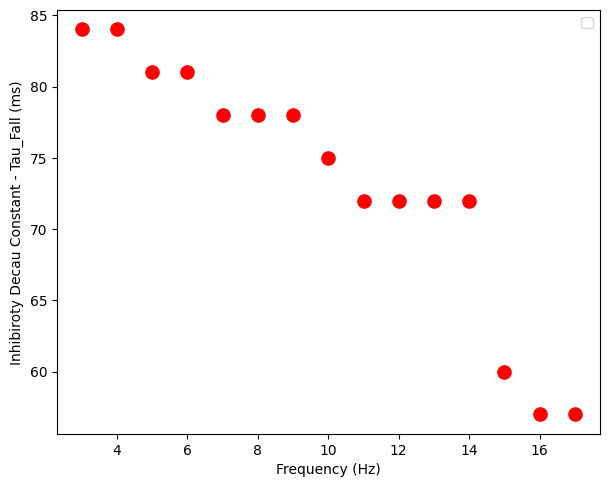

In [4]:
Frequency = [84,84,81,81,78,78,78,75,72,72,72,72,60,57,57]
Tau = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

fig = plt.figure(figsize=(7,5.5))#figsize=(8,8)
ax = fig.add_subplot()
#plt.title('Eigen Values for Various Delays for ')
plt.plot(Tau, Frequency, 'ro',markersize=9.5, linewidth = 1.0, clip_on=False)
#plt.plot(Delay, tl21_pred, 'r+', markerfacecolor='none', linewidth = 1.0,markersize=9.5,clip_on=False)
#plt.plot(Delay, tl12_obs, 'bo',markerfacecolor='none', linewidth = 1.0, markersize=9.5,clip_on=False, label='Emulator')
#plt.plot(Delay, tl21_obs, 'bo', markerfacecolor='none' ,linewidth = 1.0,  markersize=9.5,clip_on=False)
#plt.axvline(x = (4.8/5.97),color='k',linestyle='--')
#plt.plot(x2, y2, 'r.', markersize=2.5,  label='Neuron2')
#plt.plot(x12, y12, 'g.', markersize=2.5,  label='k = 2, Neuron1')
#plt.plot(x22, y22, 'k.', markersize=2.5, label='k = 2, Neuron2')
plt.legend()
plt.ylabel('Inhibiroty Decau Constant - Tau_Fall (ms)')
plt.xlabel('Frequency (Hz)')

#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.xlim([0,20])
#plt.ylim([0,20])
#plt.savefig('DelayVsEigen.eps', format='eps')
#plt.xlim([0,1])
#plt.ylim([-1,9.5])

plt.savefig('Freq_Vs_Tau.tiff', format='tiff')
plt.savefig('Freq_Vs_Tau.eps', format='eps')
plt.show()